In [6]:
import pandas as pd
import numpy as np

import datetime as dt

In [7]:
iti = pd.read_csv(r'..\data\iti.csv')

In [8]:
iti.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,dia_mes_año,mes_año,año,mes,dia,hora,weekend,tiempo
0,5f024d791b913148f0c5edbf,cafafe19422232e54824992f88e4130ce79e0be3dbc950...,14,1,18,364,169,0,149,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
1,5f024d791b913148f0c5edc2,65840c389f151ecd831c3e713702db59f87af359d4aafa...,18,1,18,300,92,0,166,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,5
2,5f024d791b913148f0c5edc6,3970b96213e9f2a02ca7ffb991840c20dff1d531c2bf51...,13,1,19,383,49,0,128,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
3,5f024d791b913148f0c5edc9,57835e7ffe00d64403b1ae95b6d66db22f4ced98f0393f...,13,1,24,418,18,0,122,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,6
4,5f024d791b913148f0c5edca,c3c4cdc1eafed3699ad8114011ba7bd25505fc1eafe386...,3,1,16,263,183,5,185,2020-07-01T00:00:00Z,2020-07-01,2020-07,2020,7,Wednesday,0,0,4


In [131]:
iti[(iti.idunplug_station == 23) | (iti.idplug_station == 23) | (iti.idunplug_station == 24) | (iti.idplug_station == 24)]

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,dia_mes_año,mes_año,año,mes,dia,hora,weekend,tiempo


In [9]:
c1 = iti[['dia_mes_año','año','mes','mes_año','dia','hora','weekend','idunplug_station','idplug_station','tiempo']]\
        .groupby(['dia_mes_año','dia','weekend','mes','año','mes_año','hora'])\
        .agg({'idunplug_station': 'count', 'idplug_station':'count', 'tiempo': 'mean'})

In [10]:
c1.head()

idunplug_station  \
dia_mes_año dia       weekend mes año  mes_año hora                     
2020-07-01  Wednesday 0       7   2020 2020-07 0                  145   
                                               1                   63   
                                               2                   37   
                                               3                   42   
                                               4                  137   

                                                     idplug_station     tiempo  
dia_mes_año dia       weekend mes año  mes_año hora                             
2020-07-01  Wednesday 0       7   2020 2020-07 0                145  13.655172  
                                               1                 63  13.968254  
                                               2                 37  13.243243  
                                               3                 42  11.738095  
                                               4                137  11.167883

In [11]:
c1 = c1.reset_index()

In [12]:
c1.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,hora,idunplug_station,idplug_station,tiempo
0,2020-07-01,Wednesday,0,7,2020,2020-07,0,145,145,13.655172
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,63,63,13.968254
2,2020-07-01,Wednesday,0,7,2020,2020-07,2,37,37,13.243243
3,2020-07-01,Wednesday,0,7,2020,2020-07,3,42,42,11.738095
4,2020-07-01,Wednesday,0,7,2020,2020-07,4,137,137,11.167883


In [13]:
c1_iti_dia = c1.groupby(['dia_mes_año','dia','weekend','mes','año','mes_año'])\
        .agg({'idunplug_station': 'sum', 'tiempo': 'mean'}).reset_index()

In [14]:
c1_iti_dia.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,idunplug_station,tiempo
0,2020-07-01,Wednesday,0,7,2020,2020-07,15753,13.378677
1,2020-07-02,Thursday,0,7,2020,2020-07,15741,13.283277
2,2020-07-03,Friday,0,7,2020,2020-07,14586,13.245370
3,2020-07-04,Saturday,1,7,2020,2020-07,11106,13.380772
4,2020-07-05,Sunday,1,7,2020,2020-07,9129,13.514668


In [15]:
c1_iti_dia.idunplug_station.sum() == len(iti)

True

In [16]:
def cambiar_dia(x):
    if x == 'Monday':
        return 1
    elif x == 'Tuesday':
        return  2
    elif x == 'Tuesday':
        return  2
    elif x == 'Wednesday':
        return  3
    elif x == 'Thursday':
        return  4
    elif x == 'Friday':
        return  5
    elif x == 'Saturday':
        return  6
    elif x == 'Sunday':
        return  7

In [17]:
c1_iti_dia['dia_'] = c1_iti_dia['dia'].apply(cambiar_dia)

In [18]:
c1_iti_dia.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,idunplug_station,tiempo,dia_
0,2020-07-01,Wednesday,0,7,2020,2020-07,15753,13.378677,3
1,2020-07-02,Thursday,0,7,2020,2020-07,15741,13.283277,4
2,2020-07-03,Friday,0,7,2020,2020-07,14586,13.245370,5
3,2020-07-04,Saturday,1,7,2020,2020-07,11106,13.380772,6
4,2020-07-05,Sunday,1,7,2020,2020-07,9129,13.514668,7


In [19]:
c1_iti_dia.to_csv(r'..\data\c1_iti_dia.csv', index=False)  

In [20]:
c1_iti_semana_W = c1.groupby(['hora','weekend']).agg({'idunplug_station': 'mean', 'tiempo': 'mean'}).reset_index()

In [21]:
c1_iti_semana_W.shape

(48, 4)

In [22]:
c1_iti_semana_T = c1.groupby('hora').agg({'idunplug_station': 'mean', 'tiempo': 'mean'}).reset_index()

In [23]:
c1_iti_semana_T.shape

(24, 3)

In [24]:
c1_iti_semana = pd.concat([c1_iti_semana_T, c1_iti_semana_W] )

In [25]:
c1_iti_semana['weekend'][c1_iti_semana['weekend'].isna() == True] = 2

C:\Users\aaron\AppData\Local\Temp\ipykernel_17288\2893419984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1_iti_semana['weekend'][c1_iti_semana['weekend'].isna() == True] = 2


In [26]:
c1_iti_semana

,hora,idunplug_station,tiempo,weekend
0,0,69.950413,11.617104,2.0
1,1,39.572222,11.519483,2.0
2,2,26.731844,11.557525,2.0
3,3,27.946779,11.906150,2.0
4,4,57.958678,11.081932,2.0
...,...,...,...,...
43,21,370.807692,13.614827,1.0
44,22,299.219231,12.049461,0.0
45,22,334.913462,12.605705,1.0
46,23,147.401544,11.596571,0.0


In [27]:
c1_iti_semana.to_csv(r'..\data\c1_iti_semana.csv', index=False)

In [28]:
c1.to_csv(r'..\data\c1.csv', index=False)

In [29]:
c2 = iti[['dia_mes_año','año','mes','mes_año','dia','hora','weekend','idunplug_station', 'tiempo']]\
        .groupby(['dia_mes_año','dia','weekend','mes','año','mes_año','idunplug_station', 'hora'])\
        .agg(n_salidas =('idunplug_station','count'), 
             T_medio_sal = ('tiempo', 'mean')).reset_index()

In [30]:
c2.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,idunplug_station,hora,n_salidas,T_medio_sal
0,2020-07-01,Wednesday,0,7,2020,2020-07,1,1,2,9.0
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,5,2,10.5
2,2020-07-01,Wednesday,0,7,2020,2020-07,1,7,2,8.5
3,2020-07-01,Wednesday,0,7,2020,2020-07,1,8,1,53.0
4,2020-07-01,Wednesday,0,7,2020,2020-07,1,9,2,11.0


In [31]:
c2_ent = iti[['dia_mes_año','año','mes','mes_año','dia','hora','weekend','idplug_station', 'tiempo']]\
        .groupby(['dia_mes_año','dia','weekend','mes','año','mes_año','idplug_station', 'hora'])\
        .agg(n_entradas =('idplug_station','count'), 
             T_medio_ent = ('tiempo', 'mean')).reset_index()

In [32]:
c2_ent

,dia_mes_año,dia,weekend,mes,año,mes_año,idplug_station,hora,n_entradas,T_medio_ent
0,2020-07-01,Wednesday,0,7,2020,2020-07,1,5,1,8.000000
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,6,4,8.250000
2,2020-07-01,Wednesday,0,7,2020,2020-07,1,7,6,11.000000
3,2020-07-01,Wednesday,0,7,2020,2020-07,1,8,4,12.750000
4,2020-07-01,Wednesday,0,7,2020,2020-07,1,9,3,6.666667
...,...,...,...,...,...,...,...,...,...,...
1209705,2021-06-30,Wednesday,0,6,2021,2021-06,270,16,2,14.000000
1209706,2021-06-30,Wednesday,0,6,2021,2021-06,270,17,7,13.857143
1209707,2021-06-30,Wednesday,0,6,2021,2021-06,270,18,5,19.200000
1209708,2021-06-30,Wednesday,0,6,2021,2021-06,270,20,1,9.000000


In [33]:
c2.to_csv(r'..\data\c2_sal.csv', index=False)  
c2_ent.to_csv(r'..\data\c2_ent.csv', index=False)  

In [34]:
cx = iti[['dia_mes_año','año','mes','mes_año','dia','hora','weekend','idplug_station']]\
        .groupby(['dia_mes_año','dia','weekend','mes','año','mes_año', 'hora'])\
        .agg(n_entradas =('idplug_station','count')).reset_index()

In [35]:
cx.shape


(8725, 8)

In [36]:
cx.dia_mes_año.unique()[0:10]

array(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
       '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
       '2020-07-09', '2020-07-10'], dtype=object)

In [37]:
esta = pd.read_csv(r'..\data\estaciones.csv')

In [38]:
esta.id

0        1
1        2
2        3
3        4
4        5
      ... 
261    266
262    267
263    268
264    269
265    270
Name: id, Length: 266, dtype: int64

In [39]:
año = []
for d in cx.dia_mes_año.unique():
    for id_est in esta.id:
        for h in range(24):
            hora = []
            hora.append(d)
            hora.append(id_est)
            hora.append(h)
            año.append(hora)
    
        
        
        

In [40]:
ano = pd.DataFrame(año, columns=['dia_mes_año', 'id_est', 'hora'])

In [41]:
ano.shape


(2330160, 3)

In [134]:
ano = ano[~((ano.id_est == 23) | (ano.id_est == 24))]

In [ ]:
# estas dos estaciones no tienen trayectos porque estaban desabilitadas

In [135]:
ano

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora,n_salidas,T_medio_sal,n_entradas,T_medio_ent
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0,0.0,NaN,0.0,NaN
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1,2.0,9.0,0.0,NaN
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2,0.0,NaN,0.0,NaN
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3,0.0,NaN,0.0,NaN
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330155,2021-06-30,2021-06,2021,6,Wednesday,0,270,19,2.0,16.0,0.0,NaN
2330156,2021-06-30,2021-06,2021,6,Wednesday,0,270,20,2.0,21.5,1.0,9.0
2330157,2021-06-30,2021-06,2021,6,Wednesday,0,270,21,1.0,11.0,0.0,NaN
2330158,2021-06-30,2021-06,2021,6,Wednesday,0,270,22,0.0,NaN,1.0,5.0


In [136]:

ano['mes_año'] = pd.to_datetime(ano['dia_mes_año']).dt.to_period('M')
ano['año'] = pd.DatetimeIndex(ano['dia_mes_año']).year
ano['mes'] = pd.DatetimeIndex(ano['dia_mes_año']).month
ano['dia'] = pd.to_datetime(ano['dia_mes_año']).dt.day_name()


C:\Users\aaron\AppData\Local\Temp\ipykernel_17288\2772684226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano['mes_año'] = pd.to_datetime(ano['dia_mes_año']).dt.to_period('M')
C:\Users\aaron\AppData\Local\Temp\ipykernel_17288\2772684226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano['año'] = pd.DatetimeIndex(ano['dia_mes_año']).year
C:\Users\aaron\AppData\Local\Temp\ipykernel_17288\2772684226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [137]:
ano['weekend'] = ano['dia'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0)

C:\Users\aaron\AppData\Local\Temp\ipykernel_17288\2752617908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ano['weekend'] = ano['dia'].apply(lambda x: 1 if x in ['Sunday', 'Saturday'] else 0)


In [138]:
ano.head()

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora,n_salidas,T_medio_sal,n_entradas,T_medio_ent
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0,0.0,NaN,0.0,NaN
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1,2.0,9.0,0.0,NaN
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2,0.0,NaN,0.0,NaN
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3,0.0,NaN,0.0,NaN
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4,0.0,NaN,0.0,NaN


In [139]:
ano.columns

Index(['dia_mes_año', 'mes_año', 'año', 'mes', 'dia', 'weekend', 'id_est',
       'hora', 'n_salidas', 'T_medio_sal', 'n_entradas', 'T_medio_ent'],
      dtype='object')

In [140]:
ano=ano.reindex(columns=['dia_mes_año', 'mes_año', 'año', 'mes', 'dia','weekend', 'id_est', 'hora'])

In [141]:
ano.head()

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4


In [142]:
c2.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,id_est,hora,n_salidas,T_medio_sal
0,2020-07-01,Wednesday,0,7,2020,2020-07,1,1,2,9.0
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,5,2,10.5
2,2020-07-01,Wednesday,0,7,2020,2020-07,1,7,2,8.5
3,2020-07-01,Wednesday,0,7,2020,2020-07,1,8,1,53.0
4,2020-07-01,Wednesday,0,7,2020,2020-07,1,9,2,11.0


In [143]:
c2.rename(columns = {'idunplug_station':'id_est'}, inplace = True)

In [144]:
c2.columns

Index(['dia_mes_año', 'dia', 'weekend', 'mes', 'año', 'mes_año', 'id_est',
       'hora', 'n_salidas', 'T_medio_sal'],
      dtype='object')

In [145]:
ano = ano.join(c2[['dia_mes_año','id_est', 'hora', 'n_salidas', 'T_medio_sal']].set_index(['dia_mes_año','id_est', 'hora']), on=['dia_mes_año','id_est', 'hora'])


In [146]:
ano.head()

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora,n_salidas,T_medio_sal
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0,NaN,NaN
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1,2.0,9.0
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2,NaN,NaN
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3,NaN,NaN
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4,NaN,NaN


In [147]:
ano.n_salidas.sum() == len(iti)

True

In [148]:
c2_ent.head()

,dia_mes_año,dia,weekend,mes,año,mes_año,id_est,hora,n_entradas,T_medio_ent
0,2020-07-01,Wednesday,0,7,2020,2020-07,1,5,1,8.000000
1,2020-07-01,Wednesday,0,7,2020,2020-07,1,6,4,8.250000
2,2020-07-01,Wednesday,0,7,2020,2020-07,1,7,6,11.000000
3,2020-07-01,Wednesday,0,7,2020,2020-07,1,8,4,12.750000
4,2020-07-01,Wednesday,0,7,2020,2020-07,1,9,3,6.666667


In [149]:
c2_ent.rename(columns = {'idplug_station':'id_est'}, inplace = True)

In [150]:
c2_ent.columns

Index(['dia_mes_año', 'dia', 'weekend', 'mes', 'año', 'mes_año', 'id_est',
       'hora', 'n_entradas', 'T_medio_ent'],
      dtype='object')

In [151]:
c2_ent.n_entradas.sum()

3696359

In [152]:
iti[iti.idplug_station == 2009]

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,dia_mes_año,mes_año,año,mes,dia,hora,weekend,tiempo


In [153]:
ano = ano.join(c2_ent[['dia_mes_año','id_est', 'hora', 'n_entradas', 'T_medio_ent']].set_index(['dia_mes_año','id_est', 'hora']), on=['dia_mes_año','id_est', 'hora'])


In [154]:
ano

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora,n_salidas,T_medio_sal,n_entradas,T_medio_ent
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0,NaN,NaN,NaN,NaN
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1,2.0,9.0,NaN,NaN
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2,NaN,NaN,NaN,NaN
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3,NaN,NaN,NaN,NaN
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330155,2021-06-30,2021-06,2021,6,Wednesday,0,270,19,2.0,16.0,NaN,NaN
2330156,2021-06-30,2021-06,2021,6,Wednesday,0,270,20,2.0,21.5,1.0,9.0
2330157,2021-06-30,2021-06,2021,6,Wednesday,0,270,21,1.0,11.0,NaN,NaN
2330158,2021-06-30,2021-06,2021,6,Wednesday,0,270,22,NaN,NaN,1.0,5.0


In [155]:
ano.n_entradas.sum() == len(iti)

True

In [156]:
values = {"n_salidas": 0, "n_entradas": 0}
ano.fillna(value=values, inplace = True)

In [157]:
ano

,dia_mes_año,mes_año,año,mes,dia,weekend,id_est,hora,n_salidas,T_medio_sal,n_entradas,T_medio_ent
0,2020-07-01,2020-07,2020,7,Wednesday,0,1,0,0.0,NaN,0.0,NaN
1,2020-07-01,2020-07,2020,7,Wednesday,0,1,1,2.0,9.0,0.0,NaN
2,2020-07-01,2020-07,2020,7,Wednesday,0,1,2,0.0,NaN,0.0,NaN
3,2020-07-01,2020-07,2020,7,Wednesday,0,1,3,0.0,NaN,0.0,NaN
4,2020-07-01,2020-07,2020,7,Wednesday,0,1,4,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2330155,2021-06-30,2021-06,2021,6,Wednesday,0,270,19,2.0,16.0,0.0,NaN
2330156,2021-06-30,2021-06,2021,6,Wednesday,0,270,20,2.0,21.5,1.0,9.0
2330157,2021-06-30,2021-06,2021,6,Wednesday,0,270,21,1.0,11.0,0.0,NaN
2330158,2021-06-30,2021-06,2021,6,Wednesday,0,270,22,0.0,NaN,1.0,5.0


In [158]:
ano.to_csv(r'..\data\c2_iti_esta.csv', index=False)

In [159]:
ano.columns

Index(['dia_mes_año', 'mes_año', 'año', 'mes', 'dia', 'weekend', 'id_est',
       'hora', 'n_salidas', 'T_medio_sal', 'n_entradas', 'T_medio_ent'],
      dtype='object')

In [160]:
c2_3 = ano.groupby(['dia_mes_año','dia','weekend','mes','año','mes_año','id_est'])\
        .agg({'n_salidas':'sum' , 'n_entradas': 'sum' }).reset_index()

In [161]:
def ratio(x,y):
    if x > y:
        return 1 - (1 - ((y + 0.0000001)/x))
    elif x < y:
        return 1 + (1 - ((x + 0.0000001)/y))
    else:
        return 1
    
    
    
    
def ratio2(x,y,dif):
    if x > y:
        return (1 + (dif/x))
    elif x < y:
        return (1 + ((dif)/y))
    else:
        return 1

In [162]:
c2_3['ratio'] = c2_3.apply(lambda x : ratio(x['n_salidas'], x['n_entradas']), axis=1)


In [163]:
c2_3_1 = c2_3.groupby(['id_est'])\
        .agg(n_salidas =('n_salidas','sum'),
             n_salidas_AVG =('n_salidas','mean'), 
             n_entradas =('n_entradas','sum'),
             n_entradas_AVG =('n_entradas','mean')).reset_index()

In [164]:
c2_3_1 

,id_est,n_salidas,n_salidas_AVG,n_entradas,n_entradas_AVG
0,1,16063.0,44.008219,15971.0,43.756164
1,2,7936.0,21.742466,8075.0,22.123288
2,3,16888.0,46.268493,16968.0,46.487671
3,4,14964.0,40.997260,15045.0,41.219178
4,5,11648.0,31.912329,11608.0,31.802740
...,...,...,...,...,...
259,266,718.0,1.967123,637.0,1.745205
260,267,1842.0,5.046575,1735.0,4.753425
261,268,2640.0,7.232877,2976.0,8.153425
262,269,2387.0,6.539726,2289.0,6.271233


In [165]:
c2_3_1['ratio1'] = c2_3_1.apply(lambda x : ratio(x['n_salidas'], x['n_entradas']), axis=1)

In [166]:
c2_3_1['dif'] =  c2_3_1['n_entradas'] -  c2_3_1['n_salidas']

In [167]:
c2_3_1['ratio2'] = c2_3_1.apply(lambda x : ratio2(x['n_salidas'], x['n_entradas'], x['dif']), axis=1)

In [168]:
c2_3_1['ratioAVG'] = c2_3_1.apply(lambda x : ratio(x['n_salidas_AVG'], x['n_entradas_AVG']), axis=1)

In [169]:
c2_3_1['mov_TOT'] =  c2_3_1['n_entradas'] +  c2_3_1['n_salidas']
c2_3_1['mov_TOT_AVG'] =  c2_3_1['mov_TOT']/ 365

In [170]:
c2_3_1.head(24)

,id_est,n_salidas,n_salidas_AVG,n_entradas,n_entradas_AVG,ratio1,dif,ratio2,ratioAVG,mov_TOT,mov_TOT_AVG
0,1,16063.0,44.008219,15971.0,43.756164,0.994273,-92.0,0.994273,0.994273,32034.0,87.764384
1,2,7936.0,21.742466,8075.0,22.123288,1.017214,139.0,1.017214,1.017214,16011.0,43.865753
2,3,16888.0,46.268493,16968.0,46.487671,1.004715,80.0,1.004715,1.004715,33856.0,92.756164
3,4,14964.0,40.997260,15045.0,41.219178,1.005384,81.0,1.005384,1.005384,30009.0,82.216438
4,5,11648.0,31.912329,11608.0,31.802740,0.996566,-40.0,0.996566,0.996566,23256.0,63.715068
5,6,22666.0,62.098630,22623.0,61.980822,0.998103,-43.0,0.998103,0.998103,45289.0,124.079452
6,7,17915.0,49.082192,18156.0,49.742466,1.013274,241.0,1.013274,1.013274,36071.0,98.824658
7,8,16900.0,46.301370,16948.0,46.432877,1.002832,48.0,1.002832,1.002832,33848.0,92.734247
8,9,28328.0,77.610959,28436.0,77.906849,1.003798,108.0,1.003798,1.003798,56764.0,155.517808
9,10,16391.0,44.906849,16372.0,44.854795,0.998841,-19.0,0.998841,0.998841,32763.0,89.761644


In [171]:
c2_3_1.describe().T

,count,mean,std,min,25%,50%,75%,max
id_est,264.0,136.829545,77.475946,1.000000,71.750000,137.500000,203.250000,270.000000
n_salidas,264.0,14001.359848,8006.584079,718.000000,8755.500000,13453.000000,17915.500000,44950.000000
n_salidas_AVG,264.0,38.359890,21.935847,1.967123,23.987671,36.857534,49.083562,123.150685
n_entradas,264.0,14001.359848,8172.337890,637.000000,8538.250000,13626.000000,17776.500000,46051.000000
n_entradas_AVG,264.0,38.359890,22.389967,1.745205,23.392466,37.331507,48.702740,126.167123
ratio1,264.0,0.991535,0.045345,0.822261,0.977030,0.999081,1.013292,1.112903
dif,264.0,0.000000,536.711080,-2119.000000,-191.000000,-13.000000,185.250000,2587.000000
ratio2,264.0,0.991535,0.045345,0.822261,0.977030,0.999081,1.013292,1.112903
ratioAVG,264.0,0.991535,0.045345,0.822261,0.977030,0.999081,1.013291,1.112903
mov_TOT,264.0,28002.719697,16170.866756,1355.000000,17360.000000,27063.500000,35602.250000,90823.000000


<AxesSubplot:>

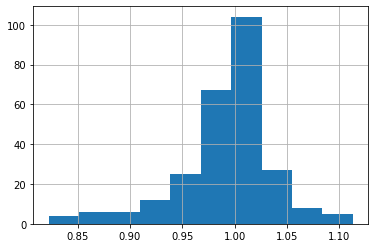

In [172]:
c2_3_1.ratio1.hist()

In [173]:
c2_3_1.to_csv(r'..\data\c2_stats_esta.csv', index=False)